Final State: {'query': 'I feel very good today!', 'response': 'LLaMA analyzed: i feel very good today! ✅ Positive path chosen', 'sentiment': 'positive'}


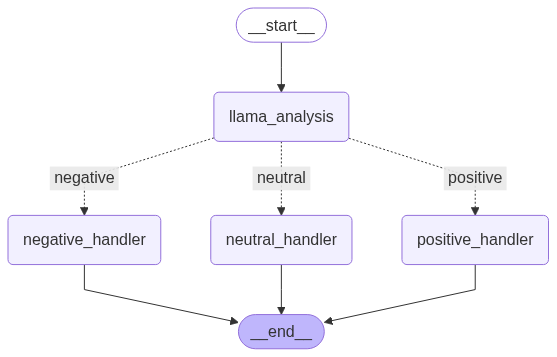

In [4]:
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END
from typing import TypedDict



In [5]:


class State(TypedDict):
    text: str
    sentiment: str
    response: str



In [6]:

llm = ChatOllama(
    model="llama3.2:1b", 
    base_url="http://localhost:11434"
)




In [7]:


def sentiment_node(state: State):
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a sentiment analysis expert. Classify the sentiment as Positive, Negative, or Neutral."),
        ("human", "{text}")
    ])
    chain = prompt | llm
    sentiment_result = chain.invoke({"text": state["text"]})
    sentiment = sentiment_result.content.strip()

    return {"sentiment": sentiment}



In [9]:

def positive_node(state: State):
    return {"response": f" Glad to hear that! You seem positive: {state['text']}"}


def negative_node(state: State):
    return {"response": f" Sorry to hear that. You seem negative: {state['text']}"}


def neutral_node(state: State):
    return {"response": f" Seems neutral: {state['text']}"}



In [10]:

# -----------------------
# 4. Conditional edge function
# -----------------------
def route_by_sentiment(state: State):
    if "positive" in state["sentiment"].lower():
        return "positive"
    elif "negative" in state["sentiment"].lower():
        return "negative"
    else:
        return "neutral"




In [11]:

workflow = StateGraph(State)

workflow.add_node("sentiment", sentiment_node)
workflow.add_node("positive", positive_node)
workflow.add_node("negative", negative_node)
workflow.add_node("neutral", neutral_node)

workflow.set_entry_point("sentiment")
workflow.add_conditional_edges("sentiment", route_by_sentiment, {
    "positive": "positive",
    "negative": "negative",
    "neutral": "neutral"
})

workflow.add_edge("positive", END)
workflow.add_edge("negative", END)
workflow.add_edge("neutral", END)


app = workflow.compile()


if __name__ == "__main__":
    user_input = input("Enter a sentence: ")
    final_state = app.invoke({"text": user_input})
    print("\n📊 Sentiment:", final_state["sentiment"])
    print("💬 Response:", final_state["response"])



📊 Sentiment: Since there is no review provided, I will assume that you meant to say "s=positive" without the word "review".

In that case, I can classify the sentiment as:

 Sentiment: Positive
 Reasoning: The text appears to be a compliment or endorsement of something, suggesting that it has made a positive impact on the person's life or experience.
💬 Response:  Glad to hear that! You seem positive: Positive s=review
